In [2]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Load the dataset
data = pd.read_csv('BLCA_GSE130001_AllDiffGenes_table.tsv', sep='\t')

# Select features and target
features = data[['Cluster', 'Celltype (malignancy)', 'Celltype (major-lineage)', 'Celltype (minor-lineage)', 'Gene', 'Percentage (%)', 'Adjusted p-value']]
target = data['log2FC']

# Define column transformer
categorical_features = ['Cluster', 'Celltype (malignancy)', 'Celltype (major-lineage)', 'Celltype (minor-lineage)', 'Gene']
numeric_features = ['Percentage (%)', 'Adjusted p-value']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

# Transform the features
X_transformed = preprocessor.fit_transform(features)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, target, test_size=0.2, random_state=42)

# Initialize LazyRegressor and fit
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)


 98%|██████████████████████████████████████████████████████████████████████████▏ | 41/42 [31:46<00:26, 26.78s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 572
[LightGBM] [Info] Number of data points in the train set: 8045, number of used features: 23
[LightGBM] [Info] Start training from score 0.016817


100%|████████████████████████████████████████████████████████████████████████████| 42/42 [31:49<00:00, 45.45s/it]

                                        Adjusted R-Squared  \
Model                                                        
TransformedTargetRegressor    1504039539333098165501952.00   
LinearRegression              1504039539333098165501952.00   
SGDRegressor                                 1075129285.70   
Lars                                                  4.30   
LarsCV                                                3.44   
KNeighborsRegressor                                   2.11   
NuSVR                                                 2.06   
SVR                                                   2.04   
QuantileRegressor                                     2.01   
Lasso                                                 1.91   
DummyRegressor                                        1.91   
ElasticNet                                            1.91   
LassoLars                                             1.91   
GaussianProcessRegressor                              1.91   
Decision

In [19]:
print(predictions.keys())

Index(['Adjusted R-Squared', 'R-Squared', 'RMSE', 'Time Taken'], dtype='object')


In [20]:
# Get the best model based on R-Squared
best_model_info = models.loc[models['R-Squared'].idxmax()]
best_model_name = best_model_info.name
print(f"Best Model based on R-Squared: {best_model_name}")
    

Best Model based on R-Squared: LassoCV


In [21]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score

# Define and train the best model (e.g., ElasticNetCV)
best_model = ElasticNetCV(cv=5, random_state=42)  # Adjust parameters if needed
best_model.fit(X_train, y_train)

# Make predictions
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Model: {best_model_name}')
print(f'Mean Squared Error: {mse_best}')
print(f'R² Score: {r2_best}')

Best Model: LassoCV
Mean Squared Error: 0.38953297523291985
R² Score: 0.2605672310563


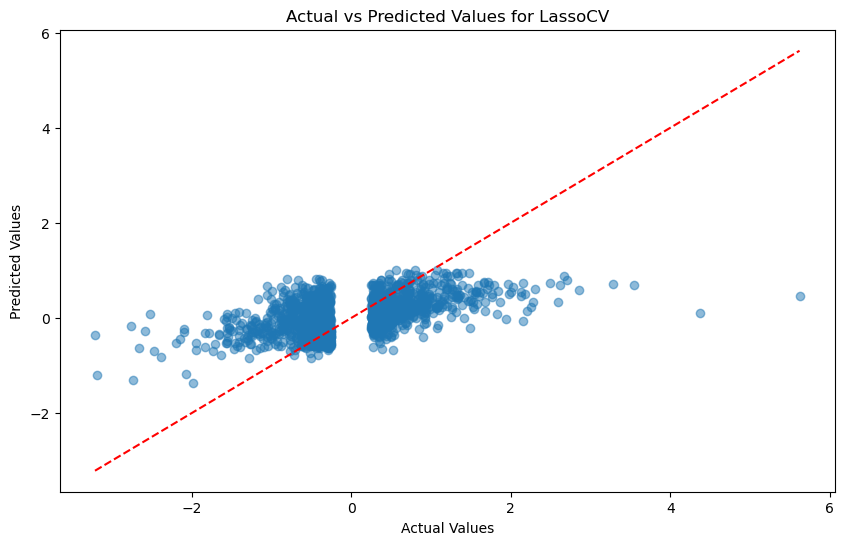

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted Values for {best_model_name}')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()


In [24]:
# Make predictions
y_pred_best = best_model.predict(X_test)

# Create a DataFrame to compare predictions with actual values
comparison_df = pd.DataFrame({'Actual': y_test.reset_index(drop=True), 'Predicted': y_pred_best})

# Display the comparison
print(comparison_df.head())

   Actual  Predicted
0    0.97       0.72
1   -0.29      -0.47
2   -1.39      -0.15
3    0.97       0.47
4    0.38       0.15


Best Model: LassoCV
Mean Squared Error: 0.38953297523291985
R² Score: 0.2605672310563


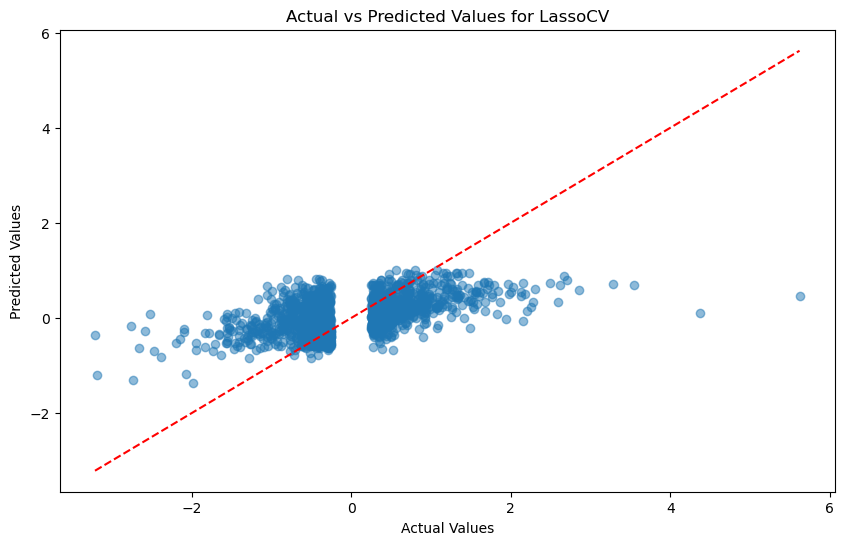

In [25]:
# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Model: {best_model_name}')
print(f'Mean Squared Error: {mse_best}')
print(f'R² Score: {r2_best}')

# Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted Values for {best_model_name}')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()
